In [1]:
cd /mnt/Sdrive/SCI-BIO-BRSDriveCircularVision/Judith/Projects/CRC/

/mnt/Sdrive/SCI-BIO-BRSDriveCircularVision/Judith/Projects/CRC


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
TT = pd.read_csv('eccDNA/Filt_Correl_CollectedCircles_CRCTumourTissue.bed',sep='\t',header=None)

In [4]:
NAT = pd.read_csv('eccDNA/Filt_Correl_CollectedCircles_CRCNormalTissue.bed',sep='\t',header=None)

In [5]:
TT.columns = ['Chromosome','Start','End','Length','Origin']
NAT.columns = ['Chromosome','Start','End','Length','Origin']

In [6]:
TT =TT.sort_values(by='Length')
NAT =NAT.sort_values(by='Length')

In [9]:
TT.describe()

,Start,End,Length
count,1.246038e+07,1.246038e+07,1.246038e+07
mean,8.293100e+07,8.293358e+07,2.578396e+03
std,5.480984e+07,5.480988e+07,6.512491e+04
min,1.076000e+04,1.182900e+04,5.000000e+01
25%,3.788576e+07,3.788839e+07,7.300000e+02
50%,7.572174e+07,7.572429e+07,1.279000e+03
75%,1.177127e+08,1.177154e+08,2.278000e+03
max,2.489386e+08,2.489394e+08,3.183130e+07


In [10]:
NAT.describe()

,Start,End,Length
count,1.782091e+06,1.782091e+06,1.782091e+06
mean,8.298341e+07,8.298677e+07,3.365865e+03
std,5.501284e+07,5.501285e+07,5.754582e+04
min,1.246000e+04,1.488000e+04,5.000000e+01
25%,3.779975e+07,3.780309e+07,1.045000e+03
50%,7.605382e+07,7.605674e+07,1.842000e+03
75%,1.175245e+08,1.175278e+08,3.448000e+03
max,2.489382e+08,2.489394e+08,2.187312e+07


In [11]:
print(np.mean(TT.Length), np.mean(NAT.Length))

2578.3959916618887 3365.8648699757755


In [7]:
TT['Length'] = np.log10(TT['Length'])
NAT['Length'] = np.log10(NAT['Length'])

<Figure size 640x480 with 0 Axes>

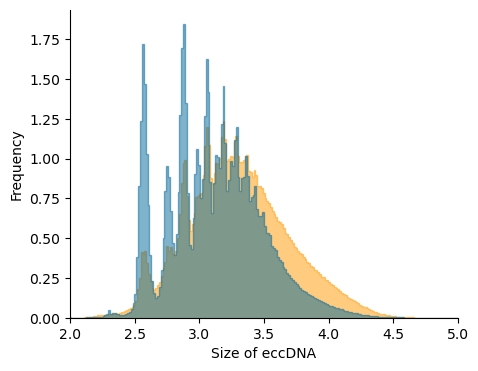

In [9]:
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9);
fig, ax = plt.subplots(1,1, figsize=(5,4)) ;
plt.xlim(2,5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
values_n, binsn,_ =plt.hist(NAT['Length'], color= "#FF9900", density=True, histtype='step',bins=400,
                            facecolor= "#FF9900",fill = True, edgecolor= "#FF9900", alpha = 0.5)
valuest, binst, _ =plt.hist(TT['Length'], color= "#006699", density=True, histtype='step',bins=400, facecolor="#006699", 
          edgecolor="#006699",fill=True, alpha=0.5)

#ax =plt.hist(,bins = 100, log = True, color= "#F49E30",stacked=True)
plt.ylabel("Frequency")
plt.xlabel("Size of eccDNA")
#plt.text(x=12000000, y=10000, s=txt)
#plt.savefig('eccDNA/Figures/Sizedistribution_TT_NATgenes_July2024.pdf', dpi = 400, bbox_inches = 'tight')
plt.show();

In [10]:
TT

,Chromosome,Start,End,Length,Origin
6399380,chr4,175023581,175023631,1.698970,CRCt-036
2497777,chr8,143302944,143302994,1.698970,CRCt-027
8968706,chr6,86613512,86613562,1.698970,CRCt-046
2298935,chr4,23140293,23140343,1.698970,CRCt-027
465196,chr17,72701868,72701918,1.698970,CRCt-021
...,...,...,...,...,...
4931379,chr16,3837345,31557242,7.442792,CRCt-033
2890651,chr5,55348246,83099895,7.443289,CRCt-028
3841501,chr7,52161518,81209799,7.463120,CRCt-030
334505,chr10,51440291,81323498,7.475427,CRCt-021


In [28]:
print(sum(np.diff(binst)*valuest), sum(np.diff(binsn)*values_n))

0.9999999999999998 0.9999999999999988


In [21]:
TT =np.diff(binst)*valuest

In [22]:
NAT =np.diff(binsn)*values_n

In [23]:
from scipy.stats import mannwhitneyu

In [24]:
statistic, p_value = mannwhitneyu(TT,NAT)

In [25]:
p_value

0.020722120568501708